<a href="https://colab.research.google.com/github/pinggu95/deep_dive_AI/blob/main/41%EC%9D%BC%EC%B0%A8_%EB%94%A5%EB%9F%AC%EB%8B%9D_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 (Keras) 로 RNN 구현하기


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

In [17]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 3)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

#  파이썬으로 RNN 구현하기

In [19]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_size = 8

inputs = np.random.random((timesteps, input_dim))

hidden_state_t = np.zeros((hidden_size,))

In [20]:
print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
Wx = np.random.random((hidden_size, input_dim))
Wh = np.random.random((hidden_size, hidden_size))
b = np.random.random((hidden_size,))

In [22]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


In [23]:
total_hidden_states = []

for input_t in inputs:
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)
  total_hidden_states.append(list(output_t))
  print(np.shape(total_hidden_states))
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0)


print(total_hidden_states)

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.98107114 0.99401403 0.94888862 0.98225208 0.9912386  0.92429952
  0.98985238 0.97711894]
 [0.99997929 0.9999453  0.99997938 0.9999111  0.99997611 0.99999436
  0.99999237 0.99999573]
 [0.99999126 0.99987456 0.99996839 0.99982487 0.99999098 0.99999713
  0.99998504 0.99999799]
 [0.99999688 0.99997973 0.99998659 0.99995145 0.99999744 0.99999808
  0.99999727 0.99999866]
 [0.9999674  0.99990179 0.99994852 0.99971878 0.99994912 0.99999365
  0.99998447 0.99999212]
 [0.9999903  0.9999862  0.99998486 0.99993744 0.99998984 0.9999958
  0.99999782 0.9999946 ]
 [0.99999145 0.99998473 0.99996949 0.99992531 0.99998779 0.999997
  0.99999677 0.99999722]
 [0.99999821 0.99999463 0.9999943  0.99998894 0.99999858 0.99999883
  0.99999907 0.99999953]
 [0.99999562 0.99999383 0.9999885  0.99998047 0.99999483 0.9999982
  0.99999861 0.99999907]
 [0.99999206 0.99998353 0.99998376 0.99994621 0.99999122 0.9999969
  0.99999721 0.9999973 ]]


## 케라스의 SimpleRNN과 LSTM

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional

In [25]:
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


In [26]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


# Simple RNN 이해하기

In [27]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일.
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-0.46898758 -0.63258106  0.12599225]], shape: (1, 3)


In [28]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.9973816   0.99873173  0.97119355]
  [-0.99860495  0.97716534 -0.7624205 ]
  [-0.05681142  0.15127262 -0.8017479 ]
  [ 0.75221825  0.99415934  0.90976006]]], shape: (1, 4, 3)


In [29]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[-0.94969773 -0.60241437  0.99768484]
  [-0.09823027 -0.24463496  0.9832724 ]
  [-0.81966907  0.33353767  0.9021486 ]
  [-0.7694764  -0.9139882   0.95540506]]], shape: (1, 4, 3)
last hidden state : [[-0.7694764  -0.9139882   0.95540506]], shape: (1, 3)


In [30]:
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[ 0.88627344 -0.9134083  -0.8724522 ]], shape: (1, 3)
last hidden state : [[ 0.88627344 -0.9134083  -0.8724522 ]], shape: (1, 3)


In [32]:
    gru = GRU(3, return_sequences=True, return_state=True)
    output, state = gru(train_X)

    print(output)
    print(state)

tf.Tensor(
[[[-0.44565508  0.961992    0.796467  ]
  [-0.56257474  0.9385193   0.6323111 ]
  [-0.5575061   0.8784026   0.8040022 ]
  [-0.66267943  0.82041216  0.872684  ]]], shape=(1, 4, 3), dtype=float32)
tf.Tensor([[-0.66267943  0.82041216  0.872684  ]], shape=(1, 3), dtype=float32)


#LSTM 이해하기


In [34]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[0.10162421 0.51837635 0.5166035 ]], shape: (1, 3)
last hidden state : [[0.10162421 0.51837635 0.5166035 ]], shape: (1, 3)
last cell state : [[0.37140667 1.4710209  1.973133  ]], shape: (1, 3)


In [35]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[-1.3644033e-02  2.6572814e-02 -1.8635958e-04]
  [-4.1522849e-02  1.3282141e-01 -5.3343532e-04]
  [-2.1172307e-01  4.4040760e-01 -7.7331276e-03]
  [-4.7638142e-01  2.2906469e-01 -1.7578406e-02]]], shape: (1, 4, 3)
last hidden state : [[-0.47638142  0.22906469 -0.01757841]], shape: (1, 3)
last cell state : [[-0.804614    0.48681438 -0.0789826 ]], shape: (1, 3)


# BiLSTM 이해하기

In [36]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [37]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


In [38]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [39]:
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


#점검 Quiz
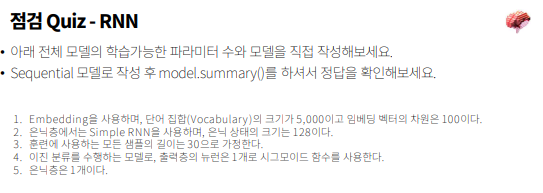

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Input(shape=(30,)))
model.add(Embedding(input_dim=5000, output_dim=100,input_shape=(30,)))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 30, 100)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_18 (SimpleRNN)       │ (None, 128)            │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,441 (2.02 MB)

 Trainable params: 529,441 (2.02 MB)

 Non-trainable params: 0 (0.00 B)